# OCR Comparison

## Google Cloud Vision API

### Auth

In [40]:
from google.cloud import storage

def authenticate_implicit_with_adc(project_id="your-google-cloud-project-id"):
    """
    When interacting with Google Cloud Client libraries, the library can auto-detect the
    credentials to use.

    // TODO(Developer):
    //  1. Before running this sample,
    //  set up ADC as described in https://cloud.google.com/docs/authentication/external/set-up-adc
    //  2. Replace the project variable.
    //  3. Make sure that the user account or service account that you are using
    //  has the required permissions. For this sample, you must have "storage.buckets.list".
    Args:
        project_id: The project id of your Google Cloud project.
    """

    # This snippet demonstrates how to list buckets.
    # *NOTE*: Replace the client created below with the client required for your application.
    # Note that the credentials are not specified when constructing the client.
    # Hence, the client library will look for credentials using ADC.
    storage_client = storage.Client(project=project_id)
    buckets = storage_client.list_buckets()
    print("Buckets:")
    for bucket in buckets:
        print(bucket.name)
    print("Listed all storage buckets.")

Specify pid (Project ID) from Google Cloud

In [41]:
pid = "primal-result-377212"
authenticate_implicit_with_adc(project_id=pid)

Buckets:
Listed all storage buckets.


### Detect text in a image

In [95]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    
    texts = response.text_annotations
    texts = [text.description for text in texts]
    
    """
    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))
    """
    
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

    return texts

## EasyOCR

In [ ]:
import easyocr

reader = easyocr.Reader(['en'], gpu=True)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## Comparing OCR methods

Load data

In [26]:
import json
import random
import matplotlib.pyplot as plt
import cv2

direc = 'E:\TFG'
imgs_dir = r"E:\TFG\train"

with open(direc + './imgs_w_txt_ocr.json') as user_file:
    imgs_w_txt_ocr = json.load(user_file)

In [109]:
def plot_imgs(path, imgs_list):
    """
    Given a path and a list full of images this functions plots them
    """
    
    fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

    for i in range(len(imgs_list)):
        full_img = path + "\\" + imgs_list[i]
        img = cv2.imread(full_img)
        imgc = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[i].imshow(imgc)
        axs[i].axis('off')
        axs[i].text(.5, .05, f"Image {i}")

    plt.show()

The next cell will show images. Run this cell until satisfied with the output

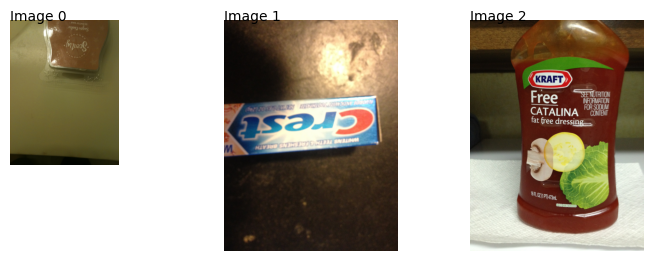

In [113]:
# Take 3 random images
test_samples = random.sample(list(imgs_w_txt.keys()), 3)

# Plot the list of images
plot_imgs(imgs_dir, test_samples)

Run this cell to get the OCR tokens from the previous images using **EasyOCR** and **Google Vision**

In [117]:
for i, img in enumerate(test_samples):
    full_img = imgs_dir + "\\" + test_samples[i]
    easyocr_result = reader.readtext(full_img, detail = 0)
    google_result = detect_text(full_img)
    print(f"\nImage {i}:")
    print("- EasyOCR: ", easyocr_result)
    print("- Google Vision: ", google_result)


Image 0:
- EasyOCR:  ['uva', 'n', 'Xinja', "014002 '", 'wobos', '1Jn&', 'brquasC', 'T1NIX']
- Google Vision:  ['•Scentsy.\nPRODUCT\nSugar Cookie\nSCENTSY BAR™', '•', 'Scentsy', '.', 'PRODUCT', 'Sugar', 'Cookie', 'SCENTSY', 'BAR', '™']

Image 1:
- EasyOCR:  ['I * #', 'CaaaD', '15243', 'CHTHPOCTGND', 'M', 'MME']
- Google Vision:  ['WHITENS TEETH GORESHENS BREATH\nCrest\nFUORDENTSAME TOOTMAAKTE NETTUTOCS OF (20)\nM', 'WHITENS', 'TEETH', 'GORESHENS', 'BREATH', 'Crest', 'FUORDENTSAME', 'TOOTMAAKTE', 'NETTUTOCS', 'OF', '(', '20', ')', 'M']

Image 2:
- EasyOCR:  ['KRAFT', 'Free', 'SHFOFTATON', 'FOR SODIUM', 'CATALINA', 'CONTENT', 'free dressing', '1478mL', '0401406790000o', 'fat', '#6FL Oz/PT) ']
- Google Vision:  ['KRAFT\nFree\nCATALINA\nfat free dressing\n16 FL OZ (1 PT) 473mL\n04014067900000\nSEE NUTRITION\nINFORMATION\nFOR SODIUM\nCONTENT', 'KRAFT', 'Free', 'CATALINA', 'fat', 'free', 'dressing', '16', 'FL', 'OZ', '(', '1', 'PT', ')', '473mL', '04014067900000', 'SEE', 'NUTRITION', 'INFORM